In [1]:
# dataset: creditcard.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
x = df.drop(['Time', 'Class'], axis = 1)

y = df['Class']

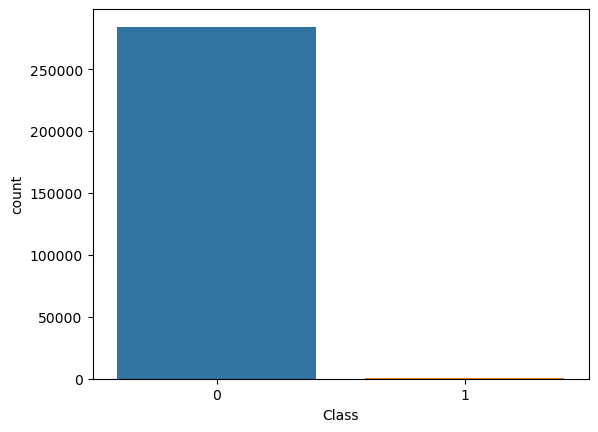

In [6]:
sns.countplot(x = y);

In [7]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### Cross validation

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.2)

### Build the model

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state= 0)

dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
y_pred = dt.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9991573329588147

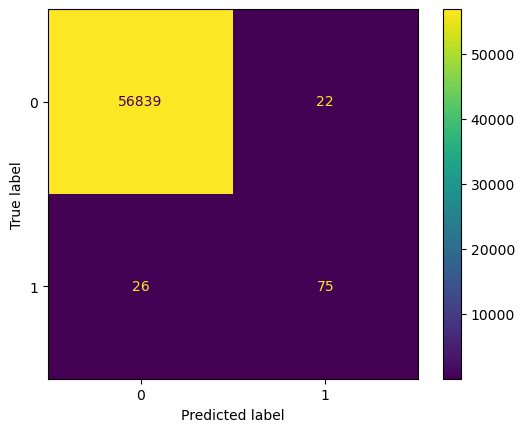

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Under Sample

In [13]:
# !pip install imbalanced-learn

In [14]:
from imblearn.under_sampling import RandomUnderSampler

In [15]:
rus = RandomUnderSampler(random_state=0)

In [16]:
x_res, y_res = rus.fit_resample(x, y)

In [17]:
y_res.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
# cross validation
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res,
                                                   random_state= 0,
                                                   test_size= 0.2)

In [19]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [20]:
y_pred = dt.predict(x_test)

In [21]:
accuracy_score(y_test, y_pred)

0.8984771573604061

### Over sampling

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
ros = RandomOverSampler(random_state= 0)

In [49]:
x_res, y_res = ros.fit_resample(x, y)

In [50]:
y_res.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [51]:
# cross validation
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res,
                                                   random_state= 0,
                                                   test_size= 0.2)

In [52]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [53]:
y_pred = dt.predict(x_test)

In [54]:
accuracy_score(y_test, y_pred)

0.9997010358229429

### SMOTE Over Sampling

In [40]:
from imblearn.over_sampling import SMOTE

smo = SMOTE(random_state= 0)

x_res, y_res = smo.fit_resample(x, y)

In [41]:
y_res.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [42]:
# cross validation
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res,
                                                   random_state= 0,
                                                   test_size= 0.2)

In [43]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [44]:
y_pred = dt.predict(x_test)

In [45]:
accuracy_score(y_test, y_pred)

0.9983293178340925

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

